In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



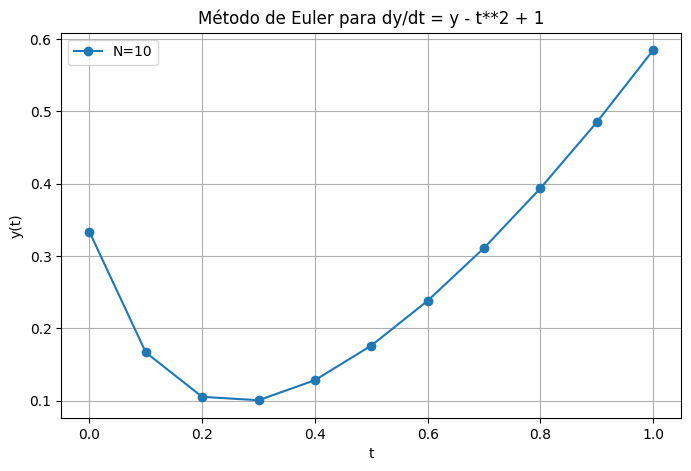

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de la ecuación diferencial
def f(t, y):
    return -5*y + 2*t**2 + 2*t

# Implementación del método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts

# Valores iniciales
a = 0.0
b = 1.0
y_t0 = 1/3

# Valores de N
N_values = [10]

# Graficar soluciones
plt.figure(figsize=(8, 5))

for N in N_values:
    ys, ts = ODE_euler(a, b, f, y_t0, N)
    plt.plot(ts, ys, marker='o', label=f'N={N}')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Método de Euler para dy/dt = y - t**2 + 1')
plt.legend()
plt.grid()
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



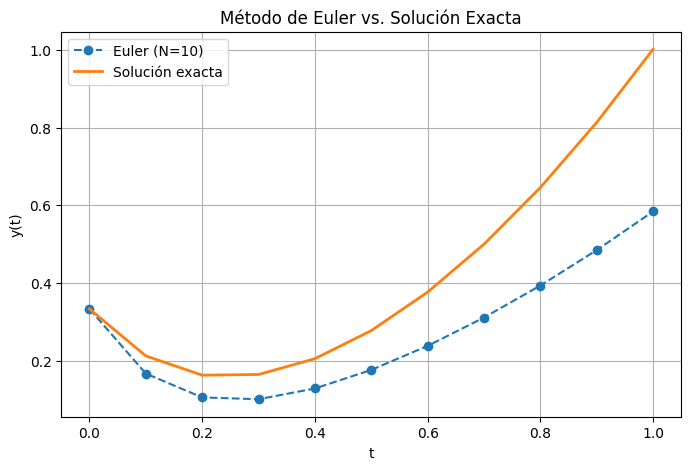

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la ecuación diferencial
def f(t, y):
    return -5*y + 2*t**2 + 2*t

# Implementación del método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts

# Definir la solución exacta
def exact_solution(t):
    return (t)**2 + (1/3) * np.exp(-5*t)

# Parámetros
a = 0.0
b = 1.0
y_t0 = 1/3
N = 10

# Obtener la solución numérica con Euler
ys_euler, ts_euler = ODE_euler(a, b, f, y_t0, N)

# Calcular la solución exacta en los mismos puntos
ys_exact = [exact_solution(t) for t in ts_euler]

# Graficar la solución exacta y la aproximada
plt.figure(figsize=(8, 5))

plt.plot(ts_euler, ys_euler, marker='o', label='Euler (N=10)', linestyle='--')
plt.plot(ts_euler, ys_exact, label='Solución exacta', linewidth=2)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Método de Euler vs. Solución Exacta')
plt.legend()
plt.grid()
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

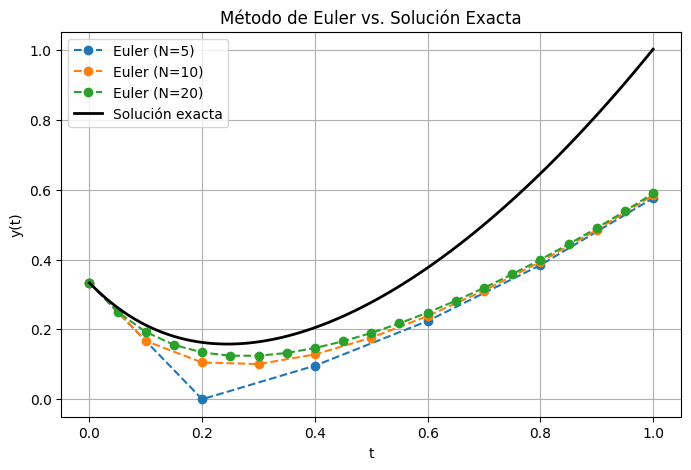

Promedio del error relativo para N=5: 0.461353
Promedio del error relativo para N=10: 0.331952
Promedio del error relativo para N=20: 0.276918


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de la ecuación diferencial
def f(t, y):
    return -5*y + 2*t**2 + 2*t

# Implementación del método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)
        t += h
        ts.append(t)
    
    return ys, ts

# Definir la solución exacta
def exact_solution(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Parámetros
a = 0.0
b = 1.0
y_t0 = 1/3
N_values = [5, 10, 20]  # Valores de N a probar

# Diccionario para almacenar errores relativos promedios
errors = {}

plt.figure(figsize=(8, 5))

# Iterar sobre diferentes valores de N
for N in N_values:
    ys_euler, ts_euler = ODE_euler(a, b, f, y_t0, N)
    ys_exact = [exact_solution(t) for t in ts_euler]
    
    # Calcular errores
    errors_abs = np.abs(np.array(ys_exact) - np.array(ys_euler))
    errors_rel = errors_abs / np.abs(ys_exact)
    
    # Calcular promedio del error relativo
    avg_rel_error = np.mean(errors_rel)
    errors[N] = avg_rel_error  # Guardar en diccionario

    # Graficar
    plt.plot(ts_euler, ys_euler, marker='o', linestyle='--', label=f'Euler (N={N})')

# Graficar la solución exacta
t_vals = np.linspace(a, b, 100)
y_vals = [exact_solution(t) for t in t_vals]
plt.plot(t_vals, y_vals, label='Solución exacta', linewidth=2, color='black')

# Configuración del gráfico
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Método de Euler vs. Solución Exacta')
plt.legend()
plt.grid()
plt.show()

# Mostrar los errores en consola
for N, err in errors.items():
    print(f"Promedio del error relativo para N={N}: {err:.6f}")
